PGM CBPDN Solver
==================

This example demonstrates use of a PGM solver for a convolutional sparse coding problem with a colour dictionary and a colour signal [[48]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-convolutional) [[25]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2018-convolutional1)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \sum_c \left\| \sum_m \mathbf{d}_{c,m} * \mathbf{x}_m -\mathbf{s}_c \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_m \|_1 \;,$$

where $\mathbf{d}_{c,m}$ is channel $c$ of the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_m$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}_c$ is channel $c$ of the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.pgm import cbpdn
from sporco.pgm.backtrack import BacktrackStandard

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True,
                                idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load colour dictionary and display it.

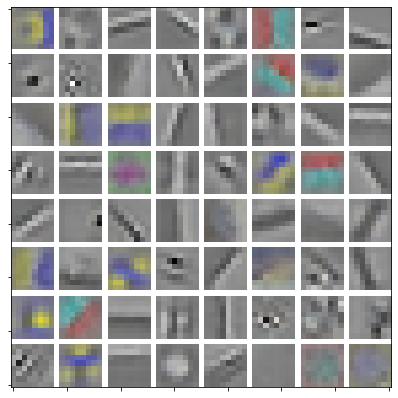

In [4]:
D = util.convdicts()['RGB:8x8x3x64']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [pgm.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.pgm.cbpdn.html#sporco.pgm.cbpdn.ConvBPDN) solver options. Note the possibility of changing parameters in the backtracking algorithm.

In [5]:
lmbda = 1e-1
L = 1e1
opt = cbpdn.ConvBPDN.Options({
    'Verbose': True, 'MaxMainIter': 250, 'RelStopTol': 8e-5, 'L': L,
    'Backtrack': BacktrackStandard(maxiter=15)})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt  L       
---------------------------------------------------------------------------------


   0  2.97e+03  2.70e+03  2.62e+03  1.98e+01  8.95e+07  -3.36e+07     15  1.54e+02


   1  2.48e+02  1.08e+02  1.40e+03  7.44e+00  3.57e+06  1.04e+07      9  6.62e+02


   2  1.37e+02  3.31e+01  1.04e+03  4.93e-01  1.10e+06  1.27e+06      1  6.62e+02


   3  1.21e+02  3.40e+01  8.72e+02  4.31e-02  1.13e+06  1.25e+06      1  6.62e+02


   4  1.16e+02  3.58e+01  7.99e+02  1.01e-02  1.19e+06  1.25e+06      1  6.62e+02
   5  1.12e+02  3.56e+01  7.66e+02  4.17e-03  1.18e+06  1.22e+06      1  6.62e+02


   6  1.09e+02  3.42e+01  7.52e+02  2.51e-03  1.14e+06  1.16e+06      1  6.62e+02
   7  1.07e+02  3.25e+01  7.45e+02  1.78e-03  1.08e+06  1.10e+06      1  6.62e+02


   8  1.05e+02  3.09e+01  7.40e+02  1.40e-03  1.03e+06  1.04e+06      1  6.62e+02
   9  1.03e+02  2.95e+01  7.35e+02  1.17e-03  9.82e+05  9.95e+05      1  6.62e+02


  10  1.01e+02  2.84e+01  7.31e+02  1.01e-03  9.44e+05  9.55e+05      1  6.62e+02
  11  1.00e+02  2.74e+01  7.26e+02  9.02e-04  9.13e+05  9.23e+05      1  6.62e+02


  12  9.87e+01  2.67e+01  7.20e+02  8.14e-04  8.88e+05  8.96e+05      1  6.62e+02
  13  9.75e+01  2.60e+01  7.15e+02  7.42e-04  8.66e+05  8.74e+05      1  6.62e+02


  14  9.64e+01  2.55e+01  7.10e+02  6.77e-04  8.48e+05  8.56e+05      1  6.62e+02


  15  9.54e+01  2.50e+01  7.04e+02  6.21e-04  8.33e+05  8.40e+05      1  6.62e+02


  16  9.45e+01  2.46e+01  6.99e+02  5.72e-04  8.20e+05  8.27e+05      1  6.62e+02


  17  9.37e+01  2.43e+01  6.94e+02  5.33e-04  8.09e+05  8.15e+05      1  6.62e+02
  18  9.29e+01  2.40e+01  6.89e+02  4.88e-04  7.99e+05  8.05e+05      1  6.62e+02


  19  9.22e+01  2.37e+01  6.85e+02  4.52e-04  7.91e+05  7.96e+05      1  6.62e+02


  20  9.15e+01  2.35e+01  6.80e+02  4.24e-04  7.83e+05  7.87e+05      1  6.62e+02
  21  9.09e+01  2.33e+01  6.76e+02  3.98e-04  7.76e+05  7.80e+05      1  6.62e+02


  22  9.03e+01  2.31e+01  6.73e+02  3.70e-04  7.69e+05  7.73e+05      1  6.62e+02


  23  8.98e+01  2.29e+01  6.69e+02  3.42e-04  7.64e+05  7.67e+05      1  6.62e+02


  24  8.93e+01  2.28e+01  6.65e+02  3.26e-04  7.58e+05  7.62e+05      1  6.62e+02


  25  8.88e+01  2.26e+01  6.62e+02  3.05e-04  7.53e+05  7.57e+05      1  6.62e+02


  26  8.84e+01  2.25e+01  6.59e+02  2.88e-04  7.49e+05  7.52e+05      1  6.62e+02
  27  8.79e+01  2.23e+01  6.56e+02  2.70e-04  7.45e+05  7.47e+05      1  6.62e+02


  28  8.75e+01  2.22e+01  6.53e+02  2.55e-04  7.41e+05  7.43e+05      1  6.62e+02


  29  8.72e+01  2.21e+01  6.50e+02  2.40e-04  7.37e+05  7.40e+05      1  6.62e+02


  30  8.68e+01  2.20e+01  6.48e+02  2.24e-04  7.34e+05  7.36e+05      1  6.62e+02
  31  8.65e+01  2.19e+01  6.45e+02  2.15e-04  7.30e+05  7.33e+05      1  6.62e+02


  32  8.61e+01  2.18e+01  6.43e+02  2.05e-04  7.27e+05  7.29e+05      1  6.62e+02


  33  8.58e+01  2.17e+01  6.41e+02  1.97e-04  7.24e+05  7.26e+05      1  6.62e+02


  34  8.55e+01  2.17e+01  6.39e+02  1.86e-04  7.21e+05  7.24e+05      1  6.62e+02


  35  8.52e+01  2.16e+01  6.37e+02  1.75e-04  7.19e+05  7.21e+05      1  6.62e+02
  36  8.50e+01  2.15e+01  6.35e+02  1.61e-04  7.17e+05  7.18e+05      1  6.62e+02


  37  8.47e+01  2.14e+01  6.33e+02  1.59e-04  7.15e+05  7.16e+05      1  6.62e+02
  38  8.45e+01  2.14e+01  6.31e+02  1.54e-04  7.12e+05  7.14e+05      1  6.62e+02


  39  8.43e+01  2.13e+01  6.29e+02  1.46e-04  7.10e+05  7.12e+05      1  6.62e+02


  40  8.40e+01  2.13e+01  6.28e+02  1.41e-04  7.09e+05  7.10e+05      1  6.62e+02


  41  8.38e+01  2.12e+01  6.26e+02  1.34e-04  7.07e+05  7.08e+05      1  6.62e+02


  42  8.36e+01  2.12e+01  6.25e+02  1.27e-04  7.05e+05  7.06e+05      1  6.62e+02
  43  8.34e+01  2.11e+01  6.23e+02  1.23e-04  7.03e+05  7.05e+05      1  6.62e+02


  44  8.32e+01  2.11e+01  6.22e+02  1.18e-04  7.02e+05  7.03e+05      1  6.62e+02


  45  8.31e+01  2.10e+01  6.20e+02  1.11e-04  7.00e+05  7.02e+05      1  6.62e+02


  46  8.29e+01  2.10e+01  6.19e+02  1.06e-04  6.99e+05  7.00e+05      1  6.62e+02
  47  8.27e+01  2.09e+01  6.18e+02  1.01e-04  6.98e+05  6.99e+05      1  6.62e+02


  48  8.26e+01  2.09e+01  6.17e+02  9.99e-05  6.97e+05  6.98e+05      1  6.62e+02


  49  8.24e+01  2.09e+01  6.15e+02  9.71e-05  6.96e+05  6.97e+05      1  6.62e+02


  50  8.23e+01  2.08e+01  6.14e+02  9.09e-05  6.95e+05  6.96e+05      1  6.62e+02
  51  8.21e+01  2.08e+01  6.13e+02  8.69e-05  6.94e+05  6.94e+05      1  6.62e+02


  52  8.20e+01  2.08e+01  6.12e+02  8.49e-05  6.93e+05  6.93e+05      1  6.62e+02


  53  8.18e+01  2.08e+01  6.11e+02  8.17e-05  6.92e+05  6.92e+05      1  6.62e+02


  54  8.17e+01  2.07e+01  6.10e+02  7.95e-05  6.91e+05  6.92e+05      1  6.62e+02
---------------------------------------------------------------------------------
ConvBPDN solve time: 17.08s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 36.76dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

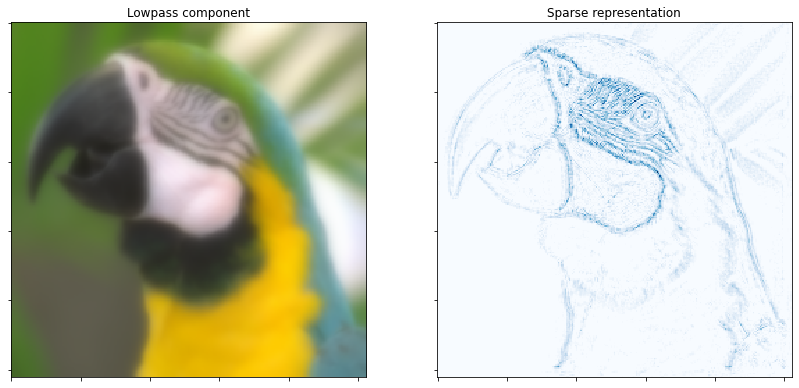

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

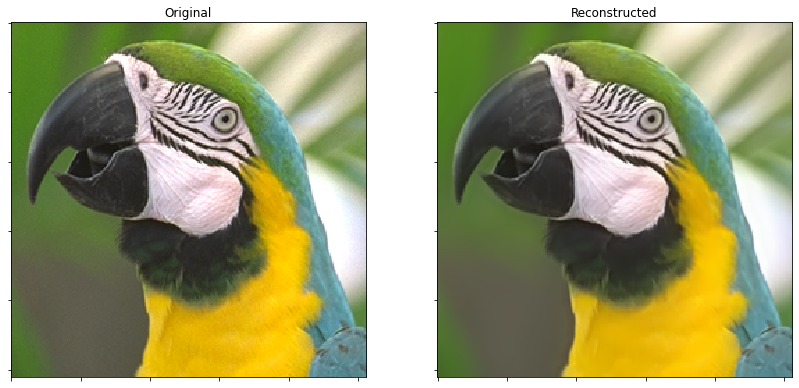

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, residual, and inverse step size parameter against the iteration number.

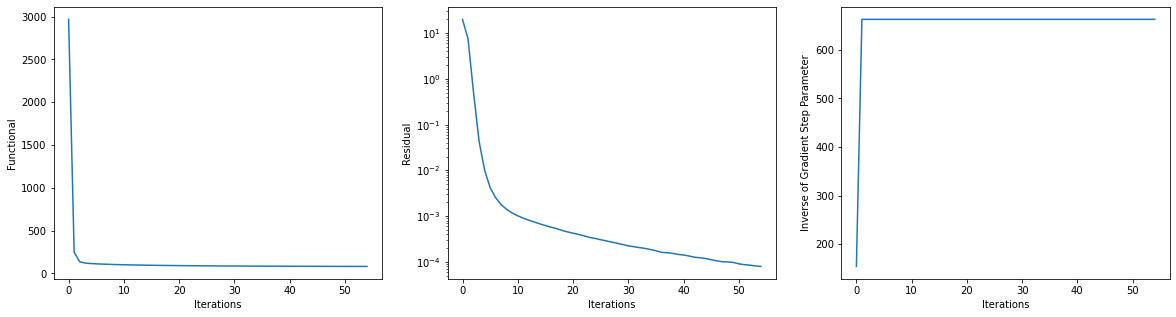

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(its.Rsdl, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.L, xlbl='Iterations',
          ylbl='Inverse of Gradient Step Parameter', fig=fig)
fig.show()